In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/student_data.csv')
data

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [3]:
def plot_points(data):
    """
        input:
            data - Pandas df
    """
    X = np.array(data[['gre','gpa']])
    y = np.array(data['admit'])
    
    admitted = X[np.argwhere(y==1)]
    X_admitted = list(map(lambda x:x[0][0], admitted))
    y_admitted = list(map(lambda x:x[0][1], admitted))
    
    rejected = X[np.argwhere(y==0)]
    X_rejected = list(map(lambda x: x[0][0], rejected))
    y_rejected = list(map(lambda x: x[0][1], rejected))
    
    plt.scatter(X_rejected, y_rejected, s = 25, color = 'red', edgecolor = 'k')
    plt.scatter(X_admitted, y_admitted, s = 25, color = 'cyan', edgecolor = 'k')
    
    plt.xlabel('Test(GRE)')
    plt.ylabel('Grades(GPA)')

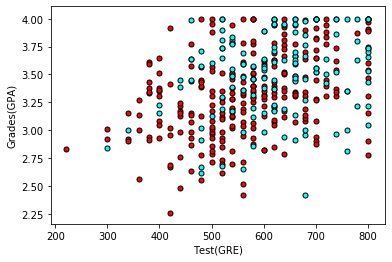

In [4]:
plot_points(data)

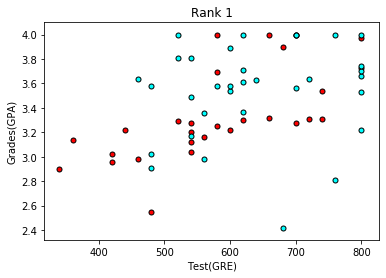

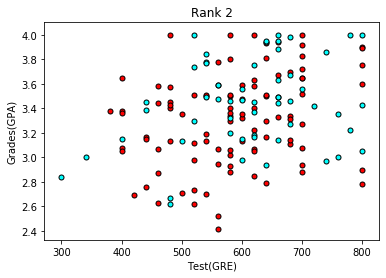

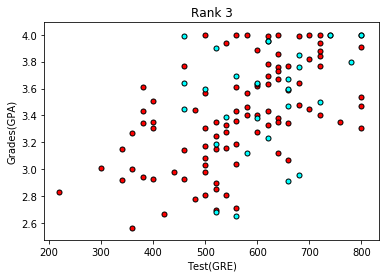

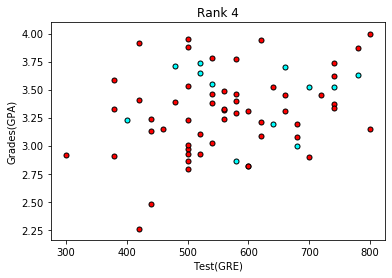

In [5]:
# plotting the graphs
for rank in range(1,5):
    plot_points(data[data['rank'] == rank])
    plt.title('Rank {0}'.format(rank))
    plt.show()

In [6]:
# make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
one_hot_data = one_hot_data.drop('rank', axis=1)
one_hot_data

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
...,...,...,...,...,...,...,...
395,0,620,4.00,0,1,0,0
396,0,560,3.04,0,0,1,0
397,0,460,2.63,0,1,0,0
398,0,700,3.65,0,1,0,0


In [7]:
# scaling the columns
one_hot_data['gre'] = one_hot_data['gre']/800
one_hot_data['gpa'] = one_hot_data['gpa']/4
one_hot_data

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
...,...,...,...,...,...,...,...
395,0,0.775,1.0000,0,1,0,0
396,0,0.700,0.7600,0,0,1,0
397,0,0.575,0.6575,0,1,0,0
398,0,0.875,0.9125,0,1,0,0


In [8]:
# spliting the data
sample = np.random.choice(one_hot_data.index, size=int(one_hot_data.shape[0]*0.9), replace =False)
train_data, test_data = one_hot_data.iloc[sample], one_hot_data.drop(sample)

In [9]:
train_data.shape[0], test_data.shape[0]

(360, 40)

In [10]:
train_data, test_data

(     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
 160      0  0.750  0.7825       0       1       0       0
 348      0  0.500  0.8400       0       1       0       0
 238      0  0.625  0.7150       0       0       0       1
 221      0  0.850  0.9975       0       0       1       0
 375      0  0.700  0.8725       0       0       0       1
 ..     ...    ...     ...     ...     ...     ...     ...
 394      1  0.575  0.9975       0       0       1       0
 246      0  0.850  0.8350       0       1       0       0
 272      1  0.850  0.9175       0       1       0       0
 236      1  0.825  0.8725       0       1       0       0
 289      0  0.525  0.5650       0       0       0       1
 
 [360 rows x 7 columns],
      admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
 2        1  1.000  1.0000       1       0       0       0
 26       1  0.775  0.9025       1       0       0       0
 27       1  0.650  0.9350       0       0       0       1
 36       0  0.725  0.8125   

In [11]:
# imports
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


Using TensorFlow backend.


In [12]:
features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], num_classes=2))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], num_classes=2))
features , targets

(array([[0.75  , 0.7825, 0.    , 1.    , 0.    , 0.    ],
        [0.5   , 0.84  , 0.    , 1.    , 0.    , 0.    ],
        [0.625 , 0.715 , 0.    , 0.    , 0.    , 1.    ],
        ...,
        [0.85  , 0.9175, 0.    , 1.    , 0.    , 0.    ],
        [0.825 , 0.8725, 0.    , 1.    , 0.    , 0.    ],
        [0.525 , 0.565 , 0.    , 0.    , 0.    , 1.    ]]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        

In [13]:
# defining model architecture
# buidling the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(.2)) # 20% chance for each nodes
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(features, targets, epochs=200, batch_size=100, verbose=0)

In [16]:
model.evaluate(features, targets)

360/360 [==============================] - 0s 123us/step


[0.5679293248388503, 0.699999988079071]

In [17]:
model.evaluate(features_test, targets_test)

40/40 [==============================] - 0s 64us/step


[0.5549665689468384, 0.7250000238418579]